# Notebook for generating plots

In [5]:
import matplotlib.pyplot as plt

In [49]:
optimas = {
    'ch130': 6110,
    'ch150': 6528,
    'eil101': 629,
    'kroA100': 21282,
    'kroC100': 20749,
    'kroD100': 21294,
    'lin105': 14379,
    'pr76': 108159,
}

In [6]:
# function to read the data from the file
def read_data(filename):
    # if odd line number, then it is a solution
    # if even line number, then it is a cost
    # skip the last line
    # on new line, append to the list
    
    with open(filename, 'r') as f:
        lines = f.readlines()
        lines = lines[:-1]
        solutions = []
        costs = []
        for i in range(len(lines)):
            if i % 2 == 0:
                #solutions.append(lines[i][:-1])
                solutions.append(list(map(int,lines[i][:-2].split(' '))))
            else:
                costs.append(float(lines[i][:-1]))
    return solutions, costs


In [11]:
def get_quality(costs, optimas, instance):
    # get the quality of the solution (cost-optimal)/optimal
    # quality = 1 - cost
    quality = []
    for cost in costs:
        quality.append((cost-optimas[instance])/optimas[instance]) 
    return quality

#### Read solutions and costs

In [45]:
# ch130
random_ch130, random_ch130_costs = read_data('solution_random_ch130.txt')
random_walk_ch130, random_walk_ch130_costs = read_data('solution_random_walk_ch130.txt')
nn_ch130, nn_ch130_costs = read_data('solution_nn_ch130.txt')
greedy_ch130, greedy_ch130_costs = read_data('solution_greedy_ch130.txt')
steepest_ch130, steepest_ch130_costs = read_data('solution_steepest_ch130.txt')

random_ch130_quality = get_quality(random_ch130_costs, optimas, 'ch130')
random_walk_ch130_quality = get_quality(random_walk_ch130_costs, optimas, 'ch130')
nn_ch130_quality = get_quality(nn_ch130_costs, optimas, 'ch130')
greedy_ch130_quality = get_quality(greedy_ch130_costs, optimas, 'ch130')
steepest_ch130_quality = get_quality(steepest_ch130_costs, optimas, 'ch130')

In [47]:
# ch150
random_ch150, random_ch150_costs = read_data('solution_random_ch150.txt')
random_walk_ch150, random_walk_ch150_costs = read_data('solution_random_walk_ch150.txt')
nn_ch150, nn_ch150_costs = read_data('solution_nn_ch150.txt')
greedy_ch150, greedy_ch150_costs = read_data('solution_greedy_ch150.txt')
steepest_ch150, steepest_ch150_costs = read_data('solution_steepest_ch150.txt')

random_ch150_quality = get_quality(random_ch150_costs, optimas, 'ch150')
random_walk_ch150_quality = get_quality(random_walk_ch150_costs, optimas, 'ch150')
nn_ch150_quality = get_quality(nn_ch150_costs, optimas, 'ch150')
greedy_ch150_quality = get_quality(greedy_ch150_costs, optimas, 'ch150')
steepest_ch150_quality = get_quality(steepest_ch150_costs, optimas, 'ch150')

In [20]:
# eil101
random_eil101, random_eil101_costs = read_data('solution_random_eil101.txt')
random_walk_eil101, random_walk_eil101_costs = read_data('solution_random_walk_eil101.txt')
nn_eil101, nn_eil101_costs = read_data('solution_nn_eil101.txt')
greedy_eil101, greedy_eil101_costs = read_data('solution_greedy_eil101.txt')
steepest_eil101, steepest_eil101_costs = read_data('solution_steepest_eil101.txt')

random_eil101_quality = get_quality(random_eil101_costs, optimas, 'eil101')
random_walk_eil101_quality = get_quality(random_walk_eil101_costs, optimas, 'eil101')
nn_eil101_quality = get_quality(nn_eil101_costs, optimas, 'eil101')
greedy_eil101_quality = get_quality(greedy_eil101_costs, optimas, 'eil101')
steepest_eil101_quality = get_quality(steepest_eil101_costs, optimas, 'eil101')

In [27]:
# kroA100
random_kroA100, random_kroA100_costs = read_data('solution_random_kroA100.txt')
random_walk_kroA100, random_walk_kroA100_costs = read_data('solution_random_walk_kroA100.txt')
nn_kroA100, nn_kroA100_costs = read_data('solution_nn_kroA100.txt')
greedy_kroA100, greedy_kroA100_costs = read_data('solution_greedy_kroA100.txt')
steepest_kroA100, steepest_kroA100_costs = read_data('solution_steepest_kroA100.txt')

random_kroA100_quality = get_quality(random_kroA100_costs, optimas, 'kroA100')
random_walk_kroA100_quality = get_quality(random_walk_kroA100_costs, optimas, 'kroA100')
nn_kroA100_quality = get_quality(nn_kroA100_costs, optimas, 'kroA100')
greedy_kroA100_quality = get_quality(greedy_kroA100_costs, optimas, 'kroA100')
steepest_kroA100_quality = get_quality(steepest_kroA100_costs, optimas, 'kroA100')

In [25]:
# kroC100
random_kroC100, random_kroC100_costs = read_data('solution_random_kroC100.txt')
random_walk_kroC100, random_walk_kroC100_costs = read_data('solution_random_walk_kroC100.txt')
nn_kroC100, nn_kroC100_costs = read_data('solution_nn_kroC100.txt')
greedy_kroC100, greedy_kroC100_costs = read_data('solution_greedy_kroC100.txt')
steepest_kroC100, steepest_kroC100_costs = read_data('solution_steepest_kroC100.txt')

random_kroC100_quality = get_quality(random_kroC100_costs, optimas, 'kroC100')
random_walk_kroC100_quality = get_quality(random_walk_kroC100_costs, optimas, 'kroC100')
nn_kroC100_quality = get_quality(nn_kroC100_costs, optimas, 'kroC100')
greedy_kroC100_quality = get_quality(greedy_kroC100_costs, optimas, 'kroC100')
steepest_kroC100_quality = get_quality(steepest_kroC100_costs, optimas, 'kroC100')

In [31]:
# kroD100
random_kroD100, random_kroD100_costs = read_data('solution_random_kroD100.txt')
random_walk_kroD100, random_walk_kroD100_costs = read_data('solution_random_walk_kroD100.txt')
nn_kroD100, nn_kroD100_costs = read_data('solution_nn_kroD100.txt')
greedy_kroD100, greedy_kroD100_costs = read_data('solution_greedy_kroD100.txt')
steepest_kroD100, steepest_kroD100_costs = read_data('solution_steepest_kroD100.txt')

random_kroD100_quality = get_quality(random_kroD100_costs, optimas, 'kroD100')
random_walk_kroD100_quality = get_quality(random_walk_kroD100_costs, optimas, 'kroD100')
nn_kroD100_quality = get_quality(nn_kroD100_costs, optimas, 'kroD100')
greedy_kroD100_quality = get_quality(greedy_kroD100_costs, optimas, 'kroD100')
steepest_kroD100_quality = get_quality(steepest_kroD100_costs, optimas, 'kroD100')

In [33]:
# lin105
random_lin105, random_lin105_costs = read_data('solution_random_lin105.txt')
random_walk_lin105, random_walk_lin105_costs = read_data('solution_random_walk_lin105.txt')
nn_lin105, nn_lin105_costs = read_data('solution_nn_lin105.txt')
greedy_lin105, greedy_lin105_costs = read_data('solution_greedy_lin105.txt')
steepest_lin105, steepest_lin105_costs = read_data('solution_steepest_lin105.txt')

random_lin105_quality = get_quality(random_lin105_costs, optimas, 'lin105')
random_walk_lin105_quality = get_quality(random_walk_lin105_costs, optimas, 'lin105')
nn_lin105_quality = get_quality(nn_lin105_costs, optimas, 'lin105')
greedy_lin105_quality = get_quality(greedy_lin105_costs, optimas, 'lin105')
steepest_lin105_quality = get_quality(steepest_lin105_costs, optimas, 'lin105')

In [15]:
# pr76
random_pr76, random_pr76_costs = read_data('solution_random_pr76.txt')
random_walk_pr76, random_walk_pr76_costs = read_data('solution_random_walk_pr76.txt')
nn_pr76, nn_pr76_costs = read_data('solution_nn_pr76.txt')
greedy_pr76, greedy_pr76_costs = read_data('solution_greedy_pr76.txt')
steepest_pr76, steepest_pr76_costs = read_data('solution_steepest_pr76.txt')

random_pr76_quality = get_quality(random_pr76_costs, optimas, 'pr76')
random_walk_pr76_quality = get_quality(random_walk_pr76_costs, optimas, 'pr76')
nn_pr76_quality = get_quality(nn_pr76_costs, optimas, 'pr76')
greedy_pr76_quality = get_quality(greedy_pr76_costs, optimas, 'pr76')
steepest_pr76_quality = get_quality(steepest_pr76_costs, optimas, 'pr76')

#### Quality

In [23]:
def create_boxplot(data, instance, xlabel='Algorithms', ylabel='Quality', title="Quality of solutions for"):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_title(title+" "+instance)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.boxplot(data, labels=['random', 'rw', 'nn', 'greedy', 'steepest'])
    plt.show()

ch130

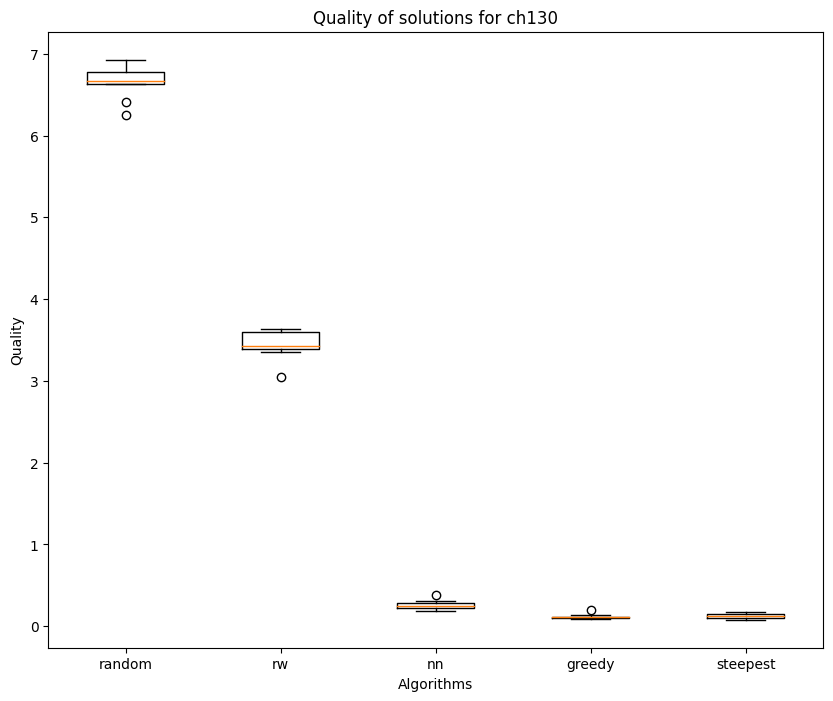

In [46]:
# create boxplot
ch130_qualities = [random_ch130_quality, random_walk_ch130_quality, nn_ch130_quality, greedy_ch130_quality, steepest_ch130_quality]
create_boxplot(ch130_qualities, 'ch130')


ch150

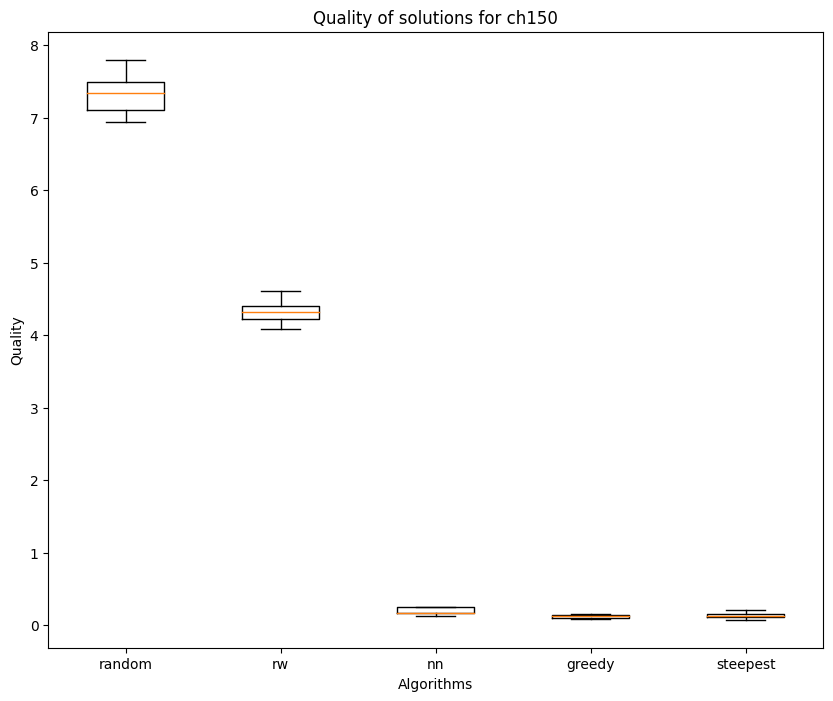

In [48]:
# create boxplot
ch150_qualities = [random_ch150_quality, random_walk_ch150_quality, nn_ch150_quality, greedy_ch150_quality, steepest_ch150_quality]
create_boxplot(ch150_qualities, 'ch150')

eil101

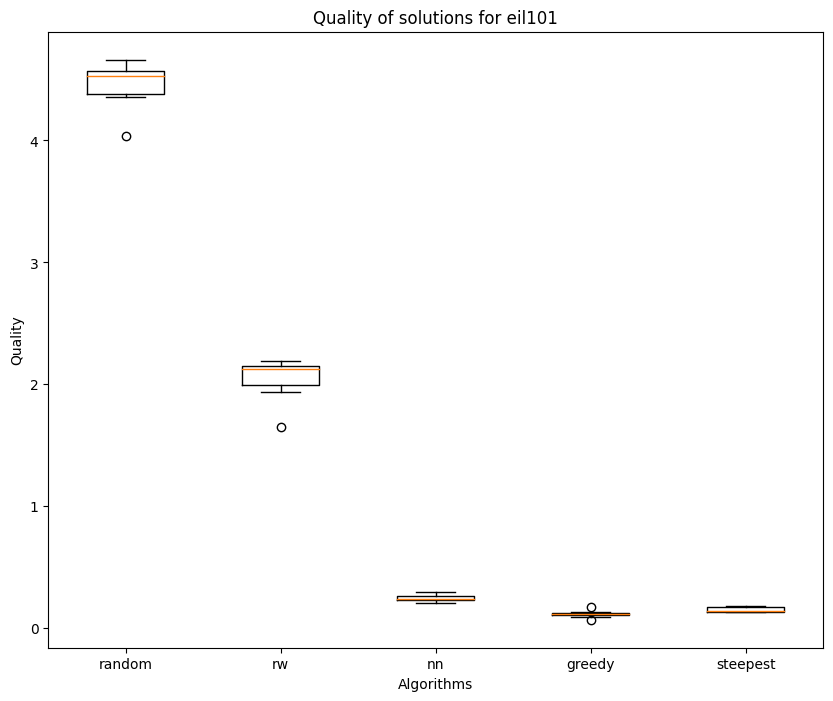

In [24]:
# create boxplot
eil101_qualities = [random_eil101_quality, random_walk_eil101_quality, nn_eil101_quality, greedy_eil101_quality, steepest_eil101_quality]
create_boxplot(eil101_qualities, 'eil101')

kroA100

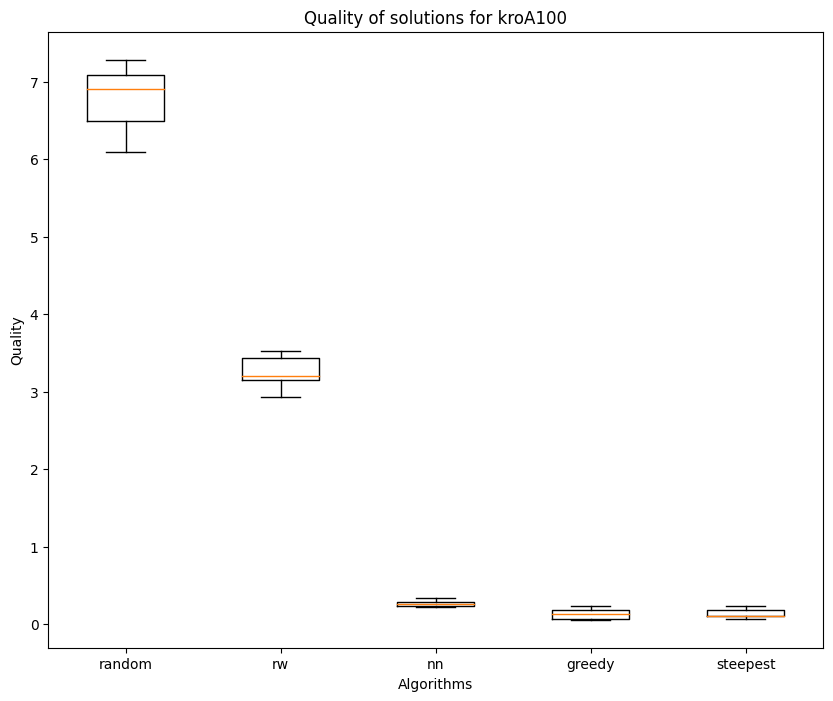

In [29]:
# create boxplot
kroA100_qualities = [random_kroA100_quality, random_walk_kroA100_quality, nn_kroA100_quality, greedy_kroA100_quality, steepest_kroA100_quality]
create_boxplot(kroA100_qualities, 'kroA100')

kroC100

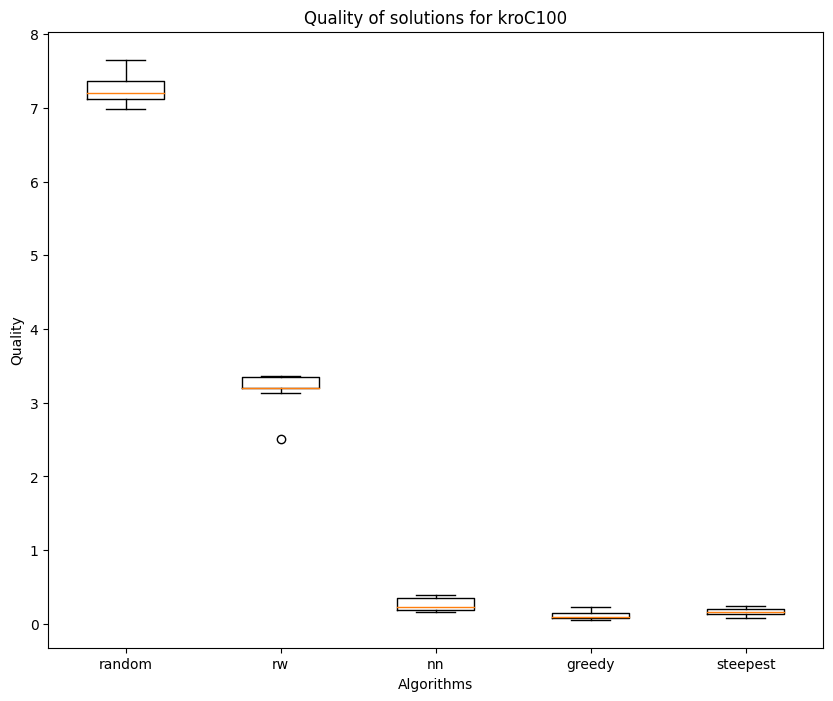

In [30]:
kroC100_qualities = [random_kroC100_quality, random_walk_kroC100_quality, nn_kroC100_quality, greedy_kroC100_quality, steepest_kroC100_quality]
create_boxplot(kroC100_qualities, 'kroC100')

kroD100

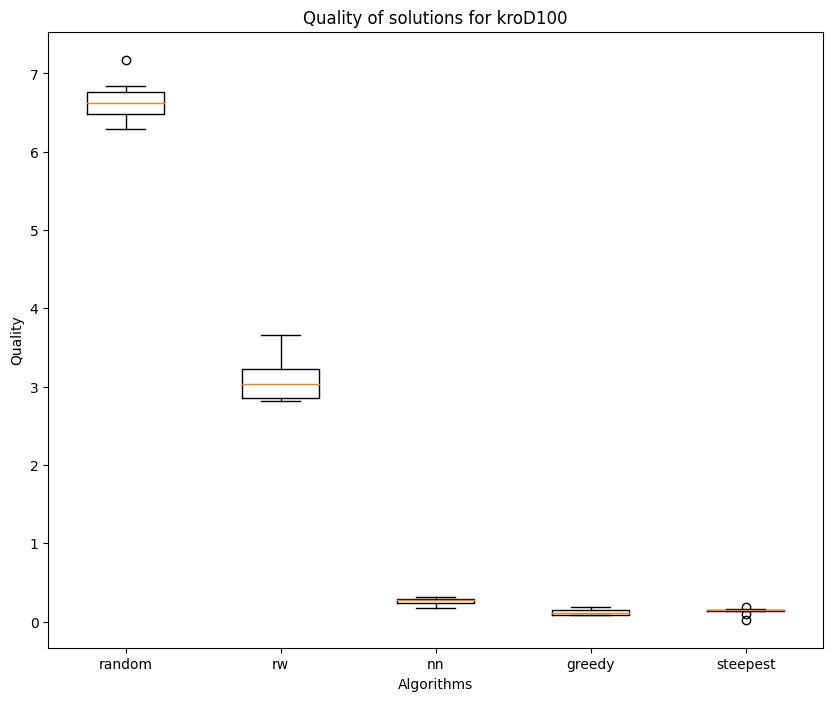

In [32]:
kroD100_qualities = [random_kroD100_quality, random_walk_kroD100_quality, nn_kroD100_quality, greedy_kroD100_quality, steepest_kroD100_quality]
create_boxplot(kroD100_qualities, 'kroD100')

lin105

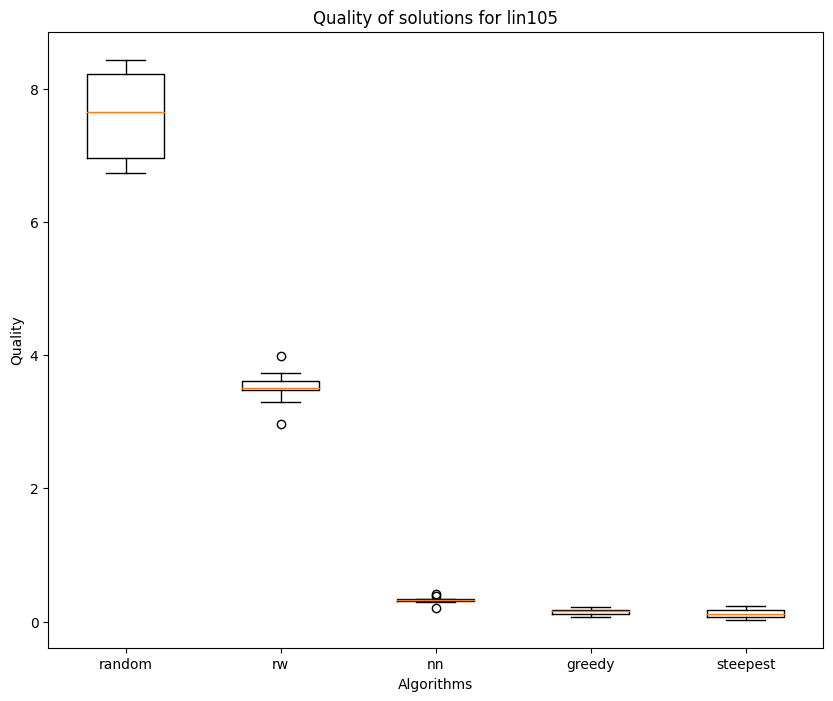

In [34]:
lin105_qualities = [random_lin105_quality, random_walk_lin105_quality, nn_lin105_quality, greedy_lin105_quality, steepest_lin105_quality]
create_boxplot(lin105_qualities, 'lin105')

pr76

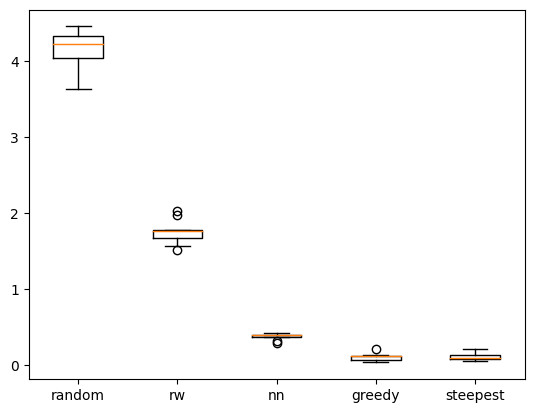

In [16]:
# create boxplot
pr76_qualities = [random_pr76_quality, random_walk_pr76_quality, nn_pr76_quality, greedy_pr76_quality, steepest_pr76_quality]
create_boxplot(pr76_qualities, 'pr76')

#### Running time

#### Efficiency

#### Average number of steps (greedy, steepest)

#### Average number of evaluated solutions (random, random walk, greedy, steepest)